In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing nltk libraries 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string 
import re

In [3]:
#reading the reviews.csv file
data=pd.read_csv("flipkart_amazon.csv")
data

Reviews  Ratings
0      Unexpected quality from pTron. Within first we...        2
1      Range breaks with number of floors.\nConcrete ...        4
2                                                   good        3
3                                            Bad product        1
4      It is very nice. Charging 1% for every 1 minut...        5
...                                                  ...      ...
20001  Good over the ear headphones with inbuilt mic....        3
20002  this may be best but no only reason sound qual...        4
20003  nice product but sound quality is not good not...        3
20004                                                 No        2
20005  Adapter is of normal quality. But cable is too...        2

[20006 rows x 2 columns]

1. This is the file with reviews and ratings records which we have scraped from e-commerce websites- Amazon and Flipkart.
2. We have already balanced the dataset. So we have a clean dataset with us.
2. We have 4000 reviews for each rating.
3. Let us study this dataset to understand the records better.

In [4]:
#randomly shuffling the data to have shuffled ratings
data=data.sample(frac=1).reset_index(drop=True)
data

Reviews  Ratings
0      Today the RouterUPS got delivered to me. I tes...        4
1      Worst Mobile From I Kall .. May Be I kall was ...        1
2      Camera is very very poor. Also unable to get t...        2
3      Your browser does not support HTML5 video.\n B...        4
4      Product is working but it the mobile holder di...        4
...                                                  ...      ...
20001  Pros: cheap price, good noise cancellation, so...        3
20002  I am an expert in ITand this product is just g...        1
20003  First time I received the printer was not even...        3
20004  It's been a month since i bought this device, ...        4
20005  This watch was more masculine than I anticipat...        3

[20006 rows x 2 columns]

In [5]:
#getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20006 entries, 0 to 20005
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  20000 non-null  object
 1   Ratings  20006 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.7+ KB


> Observation:
    >> We have thwo columns in our dataset. Reviews in which we have reviews of different products stored and ratings a float type which has either 1, 2, 3, 4 or 5 as observation. 
    >> WE have missing values in the column reviews we will drop the records with missing values.

null values
Reviews            6
Ratings            0

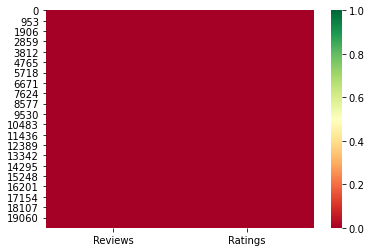

In [6]:
#checking for null values in the dataset with heatmap
sns.heatmap(data.isnull(),cmap='RdYlGn')
data.isnull().sum().to_frame().rename(columns={0:'null values'})

Observation: We will drop the null values.

In [7]:
data.dropna(inplace=True)
data.isnull().sum()

Reviews    0
Ratings    0
dtype: int64

> we are now without any missing values

In [8]:
#getting some insights about the reviews using describe function
data.groupby('Ratings')['Reviews'].describe().T

Ratings             1                                                  2  \
count            4000                                               3979   
unique           3153                                               3033   
top      Poor quality  Don't buy this product waste of money , over h...   
freq               26                                                 20   

Ratings     3     4     5  
count    3999  4023  3999  
unique   3013  2891  2871  
top      Good  Good  Good  
freq       50   107    53

> Observation:
    >> We have close to 4000 reviews for all the ratings.
    
   >> Top occuring text in reviews column for rating 1 is poor quality, 2 has negative words 'waste of money' which simply indicates bad and negative review and support the rating 1 and 2 to be a negative rating.
   
   >> For ratings 3, 4 and 5 we see word 'good' appearing most number of times.


# Data Visualization

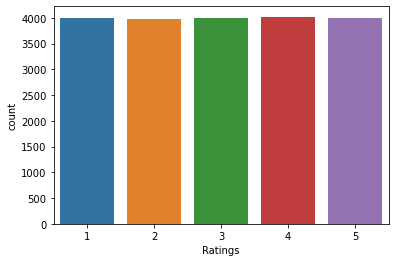

Ratings
4     4023
1     4000
5     3999
3     3999
2     3979

In [9]:
sns.countplot(data['Ratings'])
plt.show()
data['Ratings'].value_counts().to_frame().rename(columns={0:'value counts'})

> We can see we have balanced records for all the ratings as we have almost equal numbe rof observations for all the ratings.

In [10]:
#checking the length of reviews
data['Length']=data['Reviews'].apply(len)

In [11]:
data

Reviews  Ratings  Length
0      Today the RouterUPS got delivered to me. I tes...        4     271
1      Worst Mobile From I Kall .. May Be I kall was ...        1     325
2      Camera is very very poor. Also unable to get t...        2     110
3      Your browser does not support HTML5 video.\n B...        4      54
4      Product is working but it the mobile holder di...        4      89
...                                                  ...      ...     ...
20001  Pros: cheap price, good noise cancellation, so...        3     584
20002  I am an expert in ITand this product is just g...        1     434
20003  First time I received the printer was not even...        3     290
20004  It's been a month since i bought this device, ...        4     437
20005  This watch was more masculine than I anticipat...        3     146

[20000 rows x 3 columns]

The review with maximum words have 15115 words
The review with minimum words have 1 words


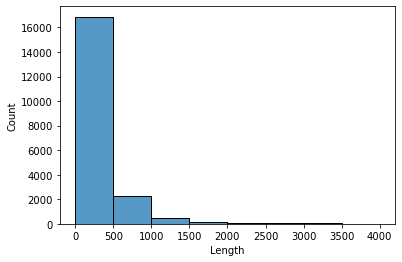

In [12]:
bins=[0,500,1000,1500,2000,2500,3000,3500,4000]
sns.histplot(data['Length'],bins=bins)
print('The review with maximum words have {} words'.format(data['Length'].max()))
print('The review with minimum words have {} words'.format(data['Length'].min()))
plt.show()

> Observation:
    >> We can see more than 16000 reviews have length upto 500.
    >> Longest review has 151115 words and shortest has only one word.

In [13]:
#Dropping reviews with more than 1000 words as extra words might delay our model and would also reduce the accuracy of the model
data_new=data[data['Length']<=1000]
print("Number of records before were: {}  and after dropping the records with reviews having more than 1000 words we have {} records left.".format(len(data),len(data_new)))

Number of records before were: 20000  and after dropping the records with reviews having more than 1000 words we have 19175 records left.


> We still have 19175 records to work with.

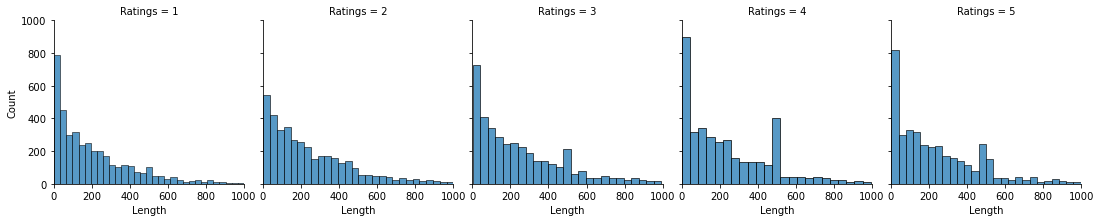

In [14]:
#plotting the length of reviews for different ratings
g=sns.FacetGrid(data_new,col='Ratings')
g.map_dataframe(sns.histplot,x='Length')
plt.axis([0,1000,0,1000])
g.set_axis_labels('Length','Count')
plt.show()

> Observation:
    >> We can observe from the plot that for rating 1 and 2 we have reviews moslty having words upto 400.
    
   >> For rating 3 and 5 we see around 800 reviews have around 50 words.
   
   >> For rating 4 we see upto 900 reviews have 50 words.

# Word Cloud

In [15]:
#importing wordcloud
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

In [16]:
def cloud_generator(i):
    df=data_new[data_new['Ratings']==i]
    words=df.Reviews.values
    rating_cloud = WordCloud(max_font_size=160, background_color ="white").generate(" ".join(words))
    plt.figure(figsize=(16,10))
    plt.subplot(211)
    plt.title("Frequent words in {} star rating".format(i),fontsize=20)
    plt.tight_layout(pad = 0)
    plt.imshow(rating_cloud, interpolation='bilinear')
    plt.axis('off') # turn off axis
    plt.show()

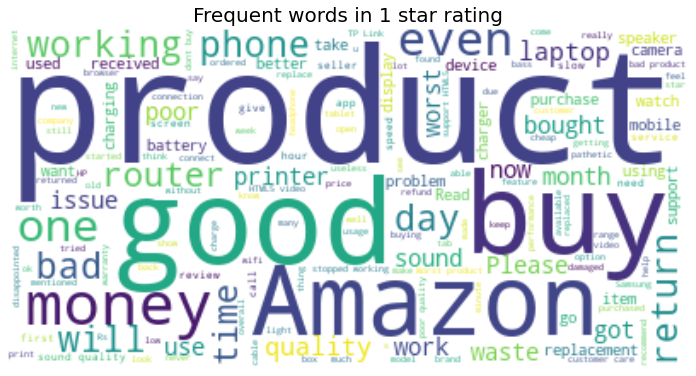

In [17]:
cloud_generator(1)

> Observation:
    >> Negative words that can be seen in 1 star rating are 'waste', 'bad', 'return', 'replacement', 'problem', 'issue'.
    
   >> Frequently occuring words are 'Amazon' 'buy', 'product'.

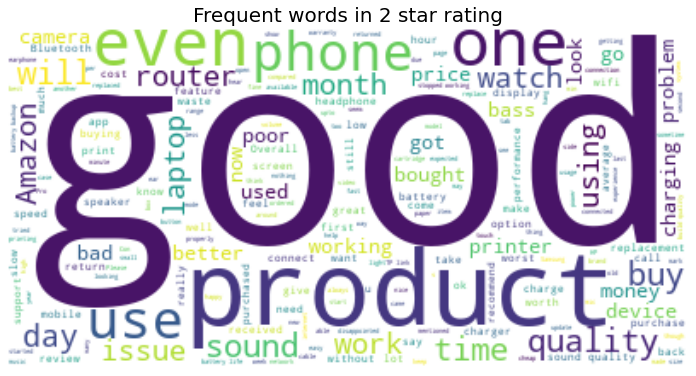

In [18]:
cloud_generator(2)

> Observation:
    >> We can see negative words like 'return', 'poor', 'problem', 'issue', 'back', 'replacement'.
    
>> Frequently occuring words are 'product', 'good', 'phone'.

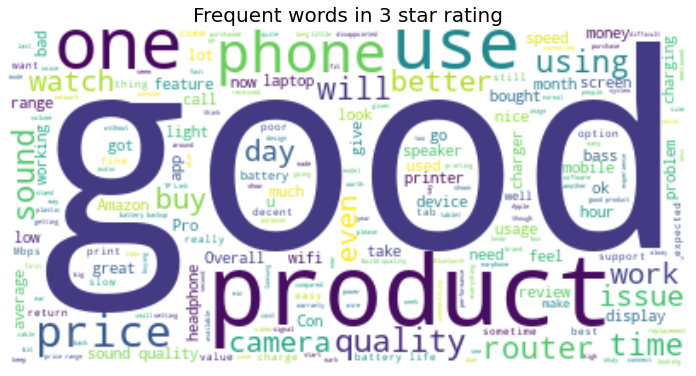

In [19]:
cloud_generator(3)

> Observation:
    >> we can see positive words like 'good' and neutral words like 'average'.

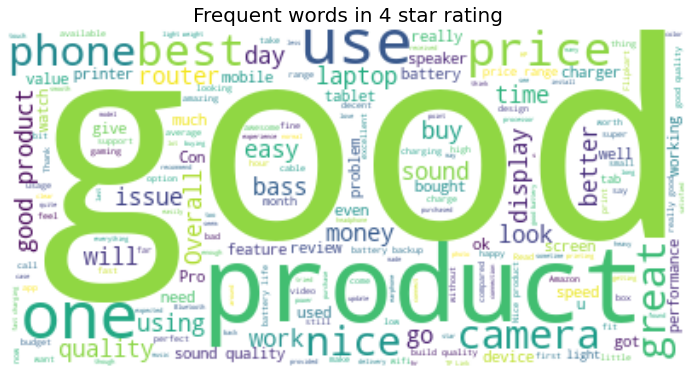

In [20]:
cloud_generator(4)

> Observation:
    >> Frequently occuring words for reviews with rating 4 are 'good', 'best', 'great', 'quality', 'nice'.

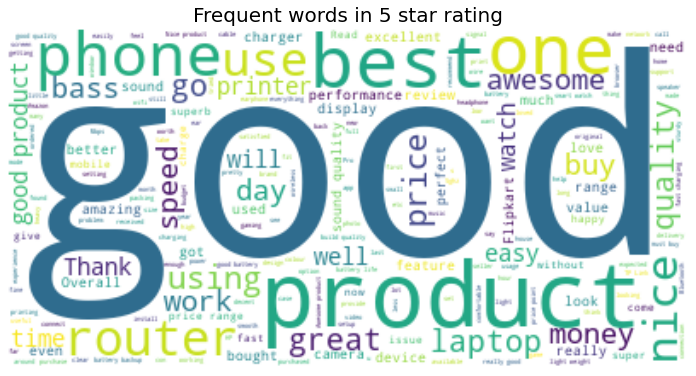

In [21]:
cloud_generator(5)

> Observation:
    >> Frequently occuring words for reviews with rating 5 are 'good', 'excellent', 'great', 'superb', 'awesome.

# Data Pre-processing

In data-preprocessing we will clean the text in following manner:

1. Converting all the words to lowercase so their is no difference between words like'New' and 'new'.
2. Removing everything from the text except words as punctuations, special characters cannot be used to identify ratings.
3. Splitting the text into single words using tokenization.
4. Removing Stop words- stopwords are the words which doesnot hold much importance and additionally add no meaning to the text.
5. Applying WordNetLemmatizer to convert the inflected words to a meaningful base word.

In [22]:
#looking at the reviews before cleaning
data_new['Reviews'][1]

'Worst Mobile From I Kall .. May Be I kall was Worst Company ... I am Saying This Because When i Insert Memory card its taken 4 Minits To switch on ... And Everything became Slow ... If i press any Button it will take 1 to 2 Minutes to respond ... Same memory card i was Insert to other mobile Celkon it was working properly..'

In [23]:
data_new['Reviews'][2]

'Camera is very very poor. Also unable to get the back cover n tempered glass for the tab. Its really difficult'

1. We can see \n, emojis and other special characters present in the reviews. We will clean the reviews to reduce the number of words present in the records. Lesser the words better the performance of the model. 

>Now we will pre-process the text and see the changes in the reviews.

In [24]:
#checking the length of stopwords
len(stopwords.words('english'))

179

In [25]:
#removing some of the negative words from the list of stop words which would help us know the ratings better.
list=['no','not',"don't",'never','but']
stop_words=[i for i in stopwords.words('english') if i not in list]
len(stop_words)

175

In [26]:
#adding some of the words that occur in wordcloud of all the ratings
list=['phone','camera','watch','laptop','headphone','charger','router','tablet','printer','amazon','flipkart','product','one']
for i in list:
    stop_words.append(i)
len(stop_words)

188

In [27]:
def process(text):
    #1. converting the text to lowercase
    lower=text.lower()
    #2. removing the punctuation and \n
    clean=re.sub("[^a-z'A-Z']+"," ",lower)
    #3. splitting the sentence into words
    tokens=word_tokenize(clean)
    #4. Removing stop words and lemmatizing the words to base words.
    lemma=WordNetLemmatizer()
    clean_text=[lemma.lemmatize(i) for i in tokens if i not in stop_words]
    #5. joining tokens again into a sentence
    clean_text=' '.join(clean_text)
    #6. returning clean text
    return clean_text

In [28]:
data_new['Clean_Reviews']=data_new['Reviews'].apply(process)

In [29]:
data_new

Reviews  Ratings  Length  \
0      Today the RouterUPS got delivered to me. I tes...        4     271   
1      Worst Mobile From I Kall .. May Be I kall was ...        1     325   
2      Camera is very very poor. Also unable to get t...        2     110   
3      Your browser does not support HTML5 video.\n B...        4      54   
4      Product is working but it the mobile holder di...        4      89   
...                                                  ...      ...     ...   
20001  Pros: cheap price, good noise cancellation, so...        3     584   
20002  I am an expert in ITand this product is just g...        1     434   
20003  First time I received the printer was not even...        3     290   
20004  It's been a month since i bought this device, ...        4     437   
20005  This watch was more masculine than I anticipat...        3     146   

                                           Clean_Reviews  
0      today routerups got delivered tested work pret...  
1      worst mobile kall may kall worst company sayin...  
2      poor also unable get back cover n tempered gla...  
3                 browser not support html video bass op  
4      working but mobile holder not come device fit ...  
...                                                  ...  
20001  pro cheap price good noise cancellation sound ...  
20002  expert itand garbage calibrate print head not ...  
20003  first time received not even starting though b...  
20004  's month since bought device overall performan...  
20005  masculine anticipated also size face large wri...  

[19175 rows x 4 columns]

In [30]:
#checking the length of reviews after pre processing
data_new['New_Length']=data_new['Clean_Reviews'].apply(len)
data_new

Reviews  Ratings  Length  \
0      Today the RouterUPS got delivered to me. I tes...        4     271   
1      Worst Mobile From I Kall .. May Be I kall was ...        1     325   
2      Camera is very very poor. Also unable to get t...        2     110   
3      Your browser does not support HTML5 video.\n B...        4      54   
4      Product is working but it the mobile holder di...        4      89   
...                                                  ...      ...     ...   
20001  Pros: cheap price, good noise cancellation, so...        3     584   
20002  I am an expert in ITand this product is just g...        1     434   
20003  First time I received the printer was not even...        3     290   
20004  It's been a month since i bought this device, ...        4     437   
20005  This watch was more masculine than I anticipat...        3     146   

                                           Clean_Reviews  New_Length  
0      today routerups got delivered tested work pret...         166  
1      worst mobile kall may kall worst company sayin...         192  
2      poor also unable get back cover n tempered gla...          69  
3                 browser not support html video bass op          38  
4      working but mobile holder not come device fit ...          51  
...                                                  ...         ...  
20001  pro cheap price good noise cancellation sound ...         418  
20002  expert itand garbage calibrate print head not ...         247  
20003  first time received not even starting though b...         197  
20004  's month since bought device overall performan...         300  
20005  masculine anticipated also size face large wri...          78  

[19175 rows x 5 columns]

> Observation:
    >> We can see that after pre-processing the reviews now have lesser words.

In [31]:
#creating bag of words using Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv=CountVectorizer(max_features=15000,ngram_range=(1,3)) #creating object
x=cv.fit_transform(data_new['Clean_Reviews']).toarray()  #storing the vecotrs into variable x

In [33]:
x.shape  #checking the shape of x

(19175, 15000)

In [34]:
y=data_new['Ratings'] #separating the label
y.shape  #checking the shape of depedant variable y

(19175,)

In [35]:
#Importing relevant packages for modeling

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import log_loss, roc_auc_score, plot_confusion_matrix

# Import ML algos
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [36]:
#splitting data into training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
print('x_train \t x_test \t y_train \t y_test')
print(x_train.shape,'\t',x_test.shape,'\t',y_train.shape,'\t',y_test.shape)

x_train 	 x_test 	 y_train 	 y_test
(14381, 15000) 	 (4794, 15000) 	 (14381,) 	 (4794,)


In [35]:
#Using GridSearchCv to find out best parameters for RandomForestClassifier
parameters={ 'n_estimators' :[100,200,300],'criterion':['gini','entropy']}
rfc=RandomForestClassifier()
clf=GridSearchCV(rfc,parameters,n_jobs=-1,scoring='accuracy')
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'gini', 'n_estimators': 300}


In [37]:
#finding optimal paramters for MultinomialNB
parameters={'alpha':np.linspace(0.5,1.5,6)}
mnb=MultinomialNB()
clf=GridSearchCV(mnb,parameters,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.5}


In [99]:
#finding optimal parameters for SVC
parameters={'kernel':['linear','poly','rbf']}
svc=SVC()
clf=GridSearchCV(svc,parameters,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'kernel': 'rbf'}


In [100]:
#Using GridSearchCV to optimize hyper parametres for DecisionTreeClassifier
parameters={'criterion':['entropy','gini']}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy'}


In [38]:
#Now we have the optimal parameters we will make instance of every algorithms.
mn=MultinomialNB(alpha=0.5)
rf=RandomForestClassifier(criterion='gini',n_estimators=300)
sv=SVC(kernel='rbf')
dt=DecisionTreeClassifier(criterion='entropy')

In [39]:
#Making a list of all the algorithms.
Model=[]
Model.append(('MultinomialNB',mn))
Model.append(('SVC',sv))
Model.append(('DecisionTreeClassifier',dt))
Model.append(('RandomForestClassifier',rf))

Model: MultinomialNB

MultinomialNB(alpha=0.5)


Accuracy Score:  0.5586149353358365
F1 Score:  0.5660043315762757
[[701 158  93  20  22]
 [262 467 181  57  40]
 [103 200 422 136 107]
 [ 34  75 132 391 278]
 [ 22  24  45 127 697]]


Classification Report: 
               precision    recall  f1-score   support

           1       0.62      0.71      0.66       994
           2       0.51      0.46      0.48      1007
           3       0.48      0.44      0.46       968
           4       0.53      0.43      0.48       910
           5       0.61      0.76      0.68       915

    accuracy                           0.56      4794
   macro avg       0.55      0.56      0.55      4794
weighted avg       0.55      0.56      0.55      4794





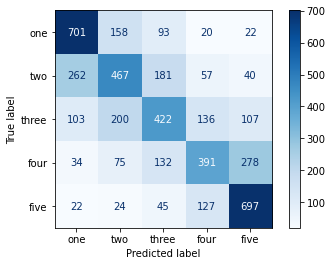



Model: SVC

SVC()


Accuracy Score:  0.606174384647476
F1 Score:  0.609624737847733
[[742 175  48  19  10]
 [249 540 148  53  17]
 [117 178 485 132  56]
 [ 46  62 127 474 201]
 [ 33  31  41 145 665]]


Classification Report: 
               precision    recall  f1-score   support

           1       0.63      0.75      0.68       994
           2       0.55      0.54      0.54      1007
           3       0.57      0.50      0.53       968
           4       0.58      0.52      0.55       910
           5       0.70      0.73      0.71       915

    accuracy                           0.61      4794
   macro avg       0.60      0.61      0.60      4794
weighted avg       0.60      0.61      0.60      4794





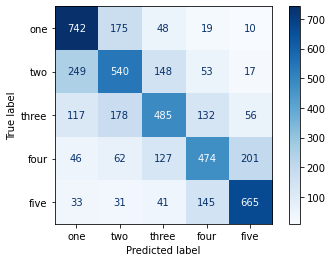



Model: DecisionTreeClassifier

DecisionTreeClassifier(criterion='entropy')


Accuracy Score:  0.5586149353358365
F1 Score:  0.5596911738814064
[[665 170  76  53  30]
 [227 506 145  80  49]
 [146 135 453 174  60]
 [ 60  56 134 491 169]
 [ 32  39  65 216 563]]


Classification Report: 
               precision    recall  f1-score   support

           1       0.59      0.67      0.63       994
           2       0.56      0.50      0.53      1007
           3       0.52      0.47      0.49       968
           4       0.48      0.54      0.51       910
           5       0.65      0.62      0.63       915

    accuracy                           0.56      4794
   macro avg       0.56      0.56      0.56      4794
weighted avg       0.56      0.56      0.56      4794





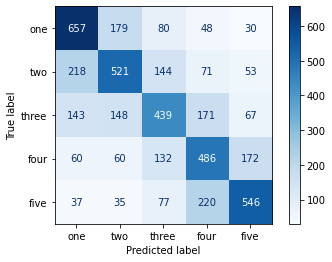



Model: RandomForestClassifier

RandomForestClassifier(n_estimators=300)


Accuracy Score:  0.613892365456821
F1 Score:  0.6188493879448022
[[768 129  53  27  17]
 [272 503 153  51  28]
 [137 129 481 143  78]
 [ 37  43 118 517 195]
 [ 20  15  49 157 674]]


Classification Report: 
               precision    recall  f1-score   support

           1       0.62      0.77      0.69       994
           2       0.61      0.50      0.55      1007
           3       0.56      0.50      0.53       968
           4       0.58      0.57      0.57       910
           5       0.68      0.74      0.71       915

    accuracy                           0.61      4794
   macro avg       0.61      0.61      0.61      4794
weighted avg       0.61      0.61      0.61      4794





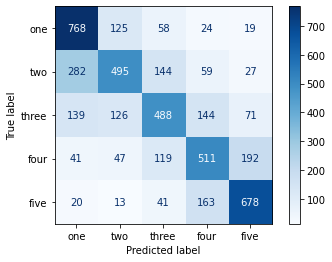

In [40]:
Models=[]
Accuracy=[]
F1=[]

for i,j in Model:
    print('Model: {}\n'.format(i))
    Models.append(i)
    
    j.fit(x_train,y_train)
    print(j)
    pred=j.predict(x_test)
    print('\n')
    
    #Accuracy score
    acc=accuracy_score(pred,y_test)
    print('Accuracy Score: ',acc)
    Accuracy.append(acc*100)
    
    #F1 score
    f1=f1_score(pred,y_test,average='weighted')
    print('F1 Score: ',f1)
    F1.append(f1*100)
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plot_confusion_matrix(j.fit(x_train,y_train),x_test,y_test,display_labels=['one','two','three','four','five'],cmap=plt.cm.Blues)
    plt.show()
    print("\n")

In [41]:
 #Dataframe to display all the results from different models.
pd.DataFrame({"Model":Models,"Accuracy Score":Accuracy,"F1 Score":F1})

Model  Accuracy Score   F1 Score
0           MultinomialNB       55.861494  56.600433
1                     SVC       60.617438  60.962474
2  DecisionTreeClassifier       55.861494  55.969117
3  RandomForestClassifier       61.389237  61.884939

In [42]:
#radndom forest being the ensemble classifier over comes overfitting and also it is the best performing model
#saving random forest
import joblib
joblib.dump(rf,'ratings_prediction.pkl')

['ratings_prediction.pkl']